In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
traingame = pd.read_csv("/Users/ks/Desktop/Train (1).csv")
testgame = pd.read_csv("/Users/ks/Desktop/Test.csv")
samplegame = pd.read_csv("/Users/ks/Desktop/sample (1).csv")

In [9]:
samplegame

,Name,Global sales
0,Nicktoons: MLB,0.09
1,Shonen Jump's One Piece: Grand Battle,0.17
2,Learn Math,0.11
3,Nitrobike,0.08
4,Cruise Ship Vacation Games,0.15
...,...,...
2138,Theresia...,0.10
2139,Sacred 2: Fallen Angel,0.14
2140,Dance Sensation!,0.09
2141,Adventure Time: The Secret of the Nameless Kin...,0.03


In [10]:
traingamey = traingame.iloc[0:,14]
traingamex = traingame.iloc[0:,0:14]

In [11]:
traingamey

0        82.53
1        40.24
2        35.52
3        32.77
4        31.37
         ...  
14571     0.01
14572     0.01
14573     0.01
14574     0.01
14575     0.01
Name: Global_Sales, Length: 14576, dtype: float64

In [81]:
data = traingamex.append(testgame,sort=False,ignore_index=True)

In [15]:
data.drop(index=[659,12103],inplace = True)

In [16]:
cc =data[data.Critic_Count.isnull()]
cc.Publisher.unique()

array(['Nintendo', 'Activision', 'Microsoft Game Studios', 'Sega',
       'Electronic Arts', 'Atari', 'Sony Computer Entertainment',
       '505 Games', 'Capcom', 'Eidos Interactive', 'Vivendi Games',
       'Enix Corporation', 'Sony Computer Entertainment Europe', 'Palcom',
       'Hasbro Interactive', 'Konami Digital Entertainment',
       'Virgin Interactive', 'Ubisoft', 'THQ', 'Fox Interactive',
       'SquareSoft', 'Acclaim Entertainment',
       'Disney Interactive Studios', 'Namco Bandai Games', nan,
       'Codemasters', 'Majesco Entertainment', 'Red Orb',
       'GT Interactive', 'Level 5', 'Arena Entertainment',
       'Take-Two Interactive', 'Square Enix', 'JVC', '989 Studios',
       'UEP Systems', 'Parker Bros.', 'Maxis', 'Imagic',
       'ASCII Entertainment', 'Mindscape', 'LucasArts', 'Unknown',
       'Square', 'Bethesda Softworks', 'Banpresto', 'D3Publisher',
       'Activision Value', 'Oxygen Interactive',
       'Red Storm Entertainment', 'Video System', 'Westwood St

In [17]:
data[data.Name.isnull()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


In [18]:
l = dict(data.Name[data.Publisher.isnull()])

In [19]:
l

{475: 'wwe Smackdown vs. Raw 2006',
 1301: 'Triple Play 99',
 1667: 'Shrek / Shrek 2 2-in-1 Gameboy Advance Video',
 2212: "Bentley's Hackpack",
 3148: 'Nicktoons Collection: Game Boy Advance Video Volume 1',
 3159: 'SpongeBob SquarePants: Game Boy Advance Video Volume 1',
 3755: 'SpongeBob SquarePants: Game Boy Advance Video Volume 2',
 4127: 'Sonic the Hedgehog',
 4508: 'The Fairly Odd Parents: Game Boy Advance Video Volume 1',
 4615: 'The Fairly Odd Parents: Game Boy Advance Video Volume 2',
 5294: 'Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)',
 5633: 'Cartoon Network Collection: Game Boy Advance Video Platinum Edition',
 6256: 'The Legend of Zelda: The Minish Cap(weekly JP sales)',
 6415: 'Sonic X: Game Boy Advance Video Volume 1',
 6532: 'Dora the Explorer: Game Boy Advance Video Volume 1',
 6626: 'Cartoon Network Collection: Game Boy Advance Video Volume 1',
 6831: 'All Grown Up!: Game Boy Advance Video Volume 1',
 7189: 'Nicktoons Collection: Game Boy Advance Video Volume 2',


In [20]:
data.Publisher[data.Name==l[475]] = "THQ"
data.Publisher[data.Name==l[1301]] = "Electronic Arts"
data.Publisher[data.Name==l[1667]] ="Take-Two Interactive"
data.Publisher[data.Name==l[2212]] ="Sony Computer Entertainment"
data.Publisher[data.Name==l[3148]] ="Majesco Entertainment"
data.Publisher[data.Name==l[3159]] ="Majesco Entertainment"
data.Publisher[data.Name==l[3755]] ="Majesco Entertainment"
data.Publisher[data.Name==l[4127]] ="Sega"
data.Publisher[data.Name==l[4508]] ="THQ"
data.Publisher[data.Name==l[4615]] ="THQ"
data.Publisher[data.Name==l[5294]] ="Nintendo"
data.Publisher[data.Name==l[5633]] ="Majesco Entertainment"
data.Publisher[data.Name==l[6256]] ="Nintendo"
data.Publisher[data.Name==l[6415]] ="Majesco Entertainment"
data.Publisher[data.Name==l[6532]] ="Gotham Games"
data.Publisher[data.Name==l[6626]] ="Nintendo"
data.Publisher[data.Name==l[6831]] ="THQ"
data.Publisher[data.Name==l[7189]] ="Nintendo"
data.Publisher[data.Name==l[7333]] ="Atari"
data.Publisher[data.Name==l[7477]] ="Nintendo"
data.Publisher[data.Name==l[7930]] ="THQ"
data.Publisher[data.Name==l[8317]]="Nintendo"
data.Publisher[data.Name==l[8328]]="Global Star"
data.Publisher[data.Name==l[8358]]="Konami Digital Entertainment"
data.Publisher[data.Name==l[8494]]="Unknown"
data.Publisher[data.Name==l[8754]]="Majesco Entertainment"
data.Publisher[data.Name==l[8837]]="Nintendo"
data.Publisher[data.Name==l[8883]]="Nintendo"
data.Publisher[data.Name==l[9703]]="Majesco Entertainment"
data.Publisher[data.Name==l[9812]]="Konami Digital Entertainment"
data.Publisher[data.Name==l[10418]]="Habro Interactive"
data.Publisher[data.Name==l[11175]]="Microsoft Game Studios"
data.Publisher[data.Name==l[11569]]="Hudson soft"
data.Publisher[data.Name==l[11985]]="Unknown"
data.Publisher[data.Name==l[12209]]="Nintendo"
data.Publisher[data.Name==l[12544]]="Wargaming.net"
data.Publisher[data.Name==l[12629]]="Nintendo"
data.Publisher[data.Name==l[12881]]="Sony Computer Entertainment"
data.Publisher[data.Name==l[13197]] = "Nintendo"
data.Publisher[data.Name==l[13274]] = "Nintendo"
data.Publisher[data.Name==l[13299]] = "Nintendo"
data.Publisher[data.Name==l[13537]] = "Unknown"
data.Publisher[data.Name==l[13876]] = "Zoo Games"
data.Publisher[data.Name==l[14137]] = "Gearbox Software"
data.Publisher[data.Name==l[14153]] = "Unknown"
data.Publisher[data.Name==l[14163]] = "Majesco Entertainment"
data.Publisher[data.Name==l[14189]] = "Ubisoft"
data.Publisher[data.Name==l[14196]] = "Unknown"
data.Publisher[data.Name==l[14519]] = "Excalibur publishing"
data.Publisher[data.Name==l[14747]] = "Unknown"
data.Publisher[data.Name==l[14975]] = "Unknown"
data.Publisher[data.Name==l[15621]] = "Majesco Entertainment"
data.Publisher[data.Name==l[16600]] = "Nintendo"
data.Publisher[data.Name==l[16644]] = "Nintendo"

/var/folders/xj/gj39qywn7r3bgzkky5txhc5w0000gn/T/ipykernel_7149/894142974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Publisher[data.Name==l[475]] = "THQ"
/var/folders/xj/gj39qywn7r3bgzkky5txhc5w0000gn/T/ipykernel_7149/894142974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Publisher[data.Name==l[1301]] = "Electronic Arts"
/var/folders/xj/gj39qywn7r3bgzkky5txhc5w0000gn/T/ipykernel_7149/894142974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [21]:
data.Year_of_Release.fillna("Unknown year",inplace =True)

In [23]:
data.Critic_Score.fillna("Unknown",inplace = True)
data.Critic_Count.fillna("Unknown",inplace = True)
data.User_Score.fillna("Unknown",inplace =True)
data.User_Count.fillna("Unknown",inplace =True)

In [24]:
data.Developer.fillna("Unknown",inplace = True)

In [25]:
data.User_Score.unique()

array(['8', 'Unknown', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3',
       '7.4', '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8',
       '3.2', '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3',
       '4.3', '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4',
       '6.8', '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2',
       '6', '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '0.6', '1.4', '0.9', '1', '1.3', '0.2', '9.7'],
      dtype=object)

In [26]:
data.Rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [27]:
data.Rating.fillna("Unknown",inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fba60d566a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba60d56d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba60d56250>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba60d6d460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba60d6d7f0>],
 'means': []}

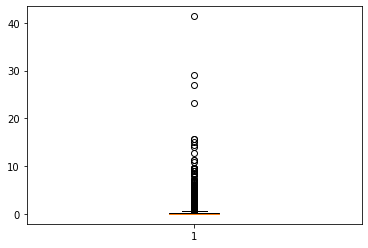

In [28]:
plt.boxplot(data.NA_Sales)

In [29]:
Q3 = data.NA_Sales.quantile(0.75)
Q1 = data.NA_Sales.quantile(0.25)
IQR = Q3-Q1

In [30]:
IQR

0.24

In [31]:
UE = Q3+(1.5*IQR)
LE = Q1-(1.5*IQR)

In [32]:
UE

0.6

In [33]:
LE

-0.36

In [34]:
data.NA_Sales[data.NA_Sales>UE] = UE

/var/folders/xj/gj39qywn7r3bgzkky5txhc5w0000gn/T/ipykernel_7149/3768509837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.NA_Sales[data.NA_Sales>UE] = UE


{'whiskers': [<matplotlib.lines.Line2D at 0x7fba800e4310>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba800e4a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba60e6df40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba800ee190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba800ee520>],
 'means': []}

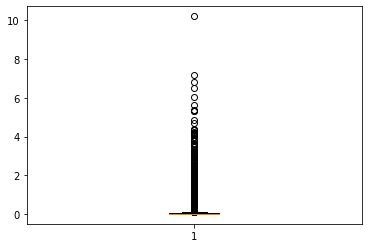

In [35]:
plt.boxplot(data.JP_Sales)

In [42]:
Q3 = data.EU_Sales.quantile(0.75)
Q1 = data.EU_Sales.quantile(0.25)
IQR = Q3 - Q1

In [43]:
UE = Q3+(1.5*IQR)
LE = Q1-(1.5*IQR)

In [36]:
data.EU_Sales[data.EU_Sales>UE] = UE

/var/folders/xj/gj39qywn7r3bgzkky5txhc5w0000gn/T/ipykernel_7149/3581511333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.EU_Sales[data.EU_Sales>UE] = UE


In [37]:
Q3 = data.JP_Sales.quantile(0.75)
Q1 = data.JP_Sales.quantile(0.25)
IQR = Q3 - Q1
UE = Q3+(1.5*IQR)
LE = Q1-(1.5*IQR)

In [38]:
data.JP_Sales[data.JP_Sales>UE] = UE

/var/folders/xj/gj39qywn7r3bgzkky5txhc5w0000gn/T/ipykernel_7149/3615430168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.JP_Sales[data.JP_Sales>UE] = UE


In [39]:
data1 = data.drop(['Publisher','Critic_Count','User_Count','Name'],axis=1)

In [40]:
dummy = pd.get_dummies(data1)

In [41]:
dummy

,NA_Sales,EU_Sales,JP_Sales,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,...,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T,Rating_Unknown
0,0.60,0.60,0.1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.60,0.60,0.1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.60,0.60,0.1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.60,0.60,0.1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.60,0.60,0.1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,0.05,0.00,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
16715,0.00,0.05,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
16716,0.06,0.00,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16717,0.00,0.05,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [42]:
scaler=MinMaxScaler()

In [43]:
scaler.fit(dummy)

MinMaxScaler()

In [44]:
d = scaler.transform(dummy)

In [45]:
df = pd.DataFrame(d)

In [46]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [50]:
traind = df.iloc[0:14576,0:]
testd = df.iloc[14574:,0:]
traingamex,testgamex = train_test_split(traind,test_size = 0.2)
traingamey,testgamey = train_test_split(traingamey,test_size = 0.2)

In [51]:
trainx.shape

(11660, 1972)

In [52]:
pca=PCA().fit(trainx)

In [53]:
pr = pr=pca.explained_variance_ratio_

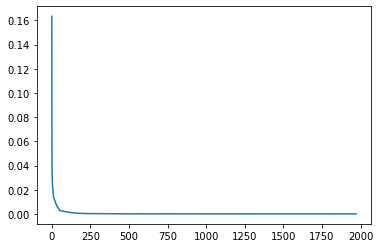

In [55]:
plt.plot(pr)

In [56]:
cmu = np.cumsum(pr)

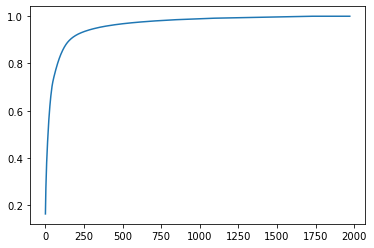

In [57]:
plt.plot(cmu)

In [58]:
pca = PCA(n_components = 500).fit(trainx)

In [59]:
pr = pr=pca.explained_variance_ratio_

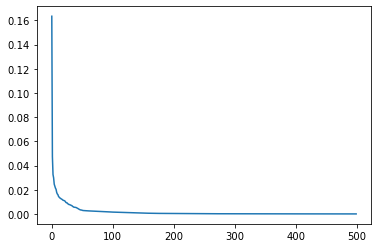

In [60]:
plt.plot(pr)

In [61]:
cp = pca.transform(trainx)
cp1 = pca.transform(testx)

In [62]:
cp = pd.DataFrame(cp)
cp1 = pd.DataFrame(cp1)

In [63]:
cp

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.236746,0.174350,0.577702,-0.363154,-0.661344,0.340784,-0.030680,0.008176,0.760758,0.067297,...,-0.004051,0.005283,-0.001114,0.000156,0.000182,0.000523,-0.000697,0.001398,-0.003728,0.000751
1,1.142922,0.142354,0.105589,0.017752,-0.081706,-0.486722,0.425325,-0.305491,-0.238752,0.351452,...,-0.000477,-0.000588,0.002016,-0.000032,-0.003663,0.002507,0.001903,-0.002321,0.002225,0.000033
2,-0.984482,-0.676112,0.190016,-0.517356,-0.145794,-0.523141,0.168599,0.026521,-0.475841,-0.131339,...,-0.069063,-0.174059,0.039267,0.081162,-0.022018,0.030306,-0.053044,0.123077,0.027330,0.125945
3,-0.883252,-0.597883,-0.728120,0.036622,-0.226753,0.114996,0.500699,0.638809,-0.028790,0.148326,...,-0.000592,0.004640,0.005617,0.000654,-0.001091,-0.004567,-0.003130,-0.000366,0.003500,0.007061
4,-1.052584,0.558180,1.102477,0.050234,-0.708244,0.171284,0.199264,-0.150558,0.487140,-0.157165,...,-0.003543,0.006660,-0.001843,-0.001837,0.000001,-0.002731,-0.003217,0.003998,0.000502,0.001357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11655,-0.930115,0.436801,0.378923,-0.112373,-0.222575,0.220391,-0.326102,-0.275157,-0.776144,-0.007956,...,-0.015408,0.035415,-0.027946,0.037516,-0.035969,0.050800,0.039447,0.036588,0.022320,0.050775
11656,1.176310,-0.056179,-0.156202,-0.077246,-0.210871,-0.383886,-0.309759,-0.002760,-0.222293,-0.108634,...,0.003914,-0.002062,-0.001880,0.004849,0.003415,-0.002921,0.000963,0.002320,-0.000912,-0.000528
11657,-0.947654,-1.100149,0.136379,0.507326,0.431915,0.362933,0.847157,0.609295,-0.081309,0.096958,...,-0.002638,0.036103,0.034264,0.014487,-0.007125,-0.031204,-0.023372,-0.003300,0.010041,0.006556
11658,-0.585659,-0.603925,0.208643,-0.077186,0.244830,-0.921557,0.525859,0.301897,-0.185469,-0.014417,...,-0.021427,-0.061109,0.013103,-0.023161,0.002808,-0.012768,-0.047183,0.033172,-0.055528,0.067425


In [66]:
model = LinearRegression().fit(cp,traingamey)

In [67]:
model.score(cp1,testgamey)

-0.03217424826109849

In [94]:
reg1 = tree.DecisionTreeRegressor(random_state=0).fit(cp,traingamey)

In [95]:
reg3 = RandomForestRegressor(max_depth=2, random_state=0).fit(cp,traingamey)

In [ ]:
regr = AdaBoostRegressor(n_estimators=100).fit(cp,traingamey)

In [ ]:
clf = GradientBoostingRegressor().fit(cp,traingamey)

In [ ]:
testgamey = sample['Global sales']

In [ ]:
reg1.score(cp,traingamey)

In [ ]:
model.score(cp1,testgamey)

In [ ]:
data.head()

In [ ]:
data.to_csv("finalout1.csv")

In [ ]:
import os
os.getcwd()